# 04 신경망 학습

## 4.1. 데이터

* 학습이란? 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것

* 알고리즘 설계하기

1) 이미지 또는 컴퓨터 비전 등 데이터 -> 특징(벡터, SIFT, SURF 등) 추출 (사람이 설계) -> 기계학습(SVM, KNN 등)
2) 신경망(딥러닝)

* 종단간 기계학습(end-to-end machine learning) : 데이터(입력)에서 목표한 결과(출력)를 사람의 개입 없이 얻는다는 뜻

신경망은 주어딘 데이터를 온전히 학습하고, 주어진 문제의 패턴을 발견하려 시도한다.

* 훈련 데이터와 시험 데이터

기계학습 문제는 데이터를 훈련 데이터(training data)와 시험 데이터(test data)로 나누어 실험을 수행한다.

훈련 데이터로 최적의 매개변수를 찾은 후 시험 데이터로 앞서 훈련한 모델의 실력 평가 => 범용 능력 판단

범용 능력 : 아직 보지 못한 데이터(훈련 데이터에 포함되지 않는 데이터)로도 문제를 올바르게 풀어내는 능력

* 오버피팅(overfitting) : 한 데이터셋에만 지나치게 최적화된 상태

## 4.2. 손실 함수

신경망은 손실 함수 지표를 기준으로 최적의 매개변수 값을 탐색한다.

#### 4.2.1. 평균 제곱 오차(mean squared error, MSE)

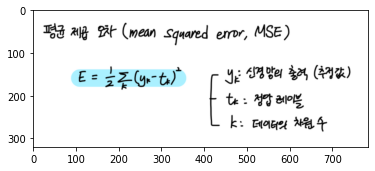

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as img

image = img.imread('img/04.png')
plt.imshow(image)
plt.show()